<a href="https://colab.research.google.com/github/Emirhan-Denizyol/Recognize-Number-With-Artificial-Neural-Networks-ANN-/blob/main/DL_With_Turkcell_ANN_Aplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECOGNIZE NUMBERS WITH ARTIFICIAL NEURAL NETWORKS (ANN)
1. Bussiness Problem
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evulation

In [1]:
#pip install tensorflow

In [2]:
 # Import Procedures of Required Libraries

 import tensorflow as tf
 from tensorflow.keras.datasets import mnist
 from tensorflow.keras.models import load_model, Sequential
 from tensorflow.keras.layers import Dense, Flatten
 from tensorflow.keras.utils import to_categorical, plot_model

 import matplotlib.pyplot as plt
 import numpy as np

 import warnings
 from warnings import filterwarnings

 warnings.filterwarnings("ignore", category=DeprecationWarning)
 warnings.filterwarnings("ignore", category=FutureWarning)
 warnings.filterwarnings("ignore", category=UserWarning)
 filterwarnings("ignore")

In [3]:
# Loading the Mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


The x's here are pixels
The y's here are the outputs (y target is a variable).

In [4]:
print("Training Set Size: ", x_train.shape, y_train.shape)

Training Set Size:  (60000, 28, 28) (60000,)


In [5]:
print("Test Set Size: ", x_test.shape, y_test.shape)

Test Set Size:  (10000, 28, 28) (10000,)


In [6]:
num_labels = len(np.unique(y_train))

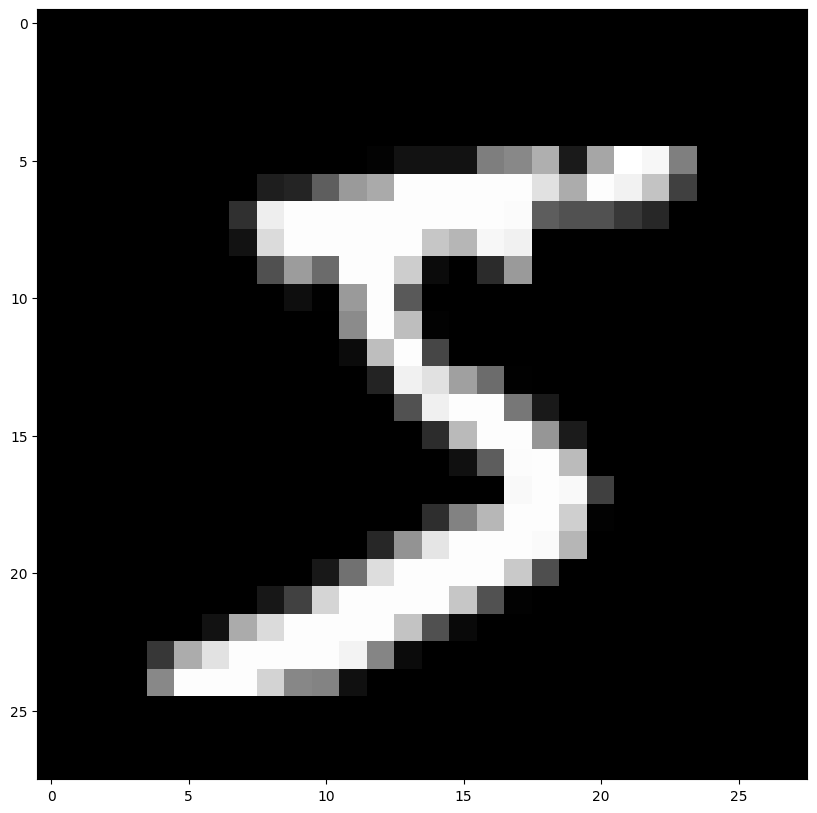

In [7]:
# Showing Examples from the Data Set

plt.figure(figsize=(10, 10))
plt.imshow(x_train[0], cmap='gray')

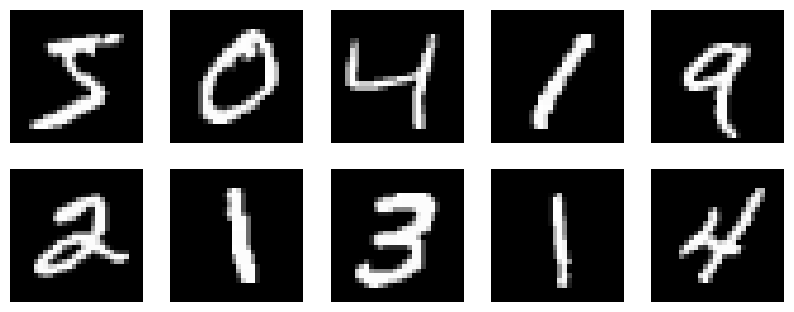

In [8]:
plt.figure(figsize=(10, 10))
for n in range(10):
  ax = plt.subplot(5, 5, n+1)   # Let's print 5 rows, 5 columns, one under the other
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')               # We also use it when we do not want axis information.

In [9]:
def visualize_img(data):
  plt.figure(figsize=(10, 10))
  for n in range(10):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

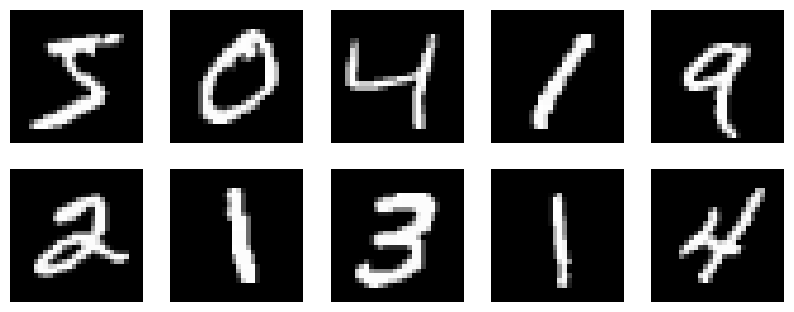

In [10]:
visualize_img(x_train)

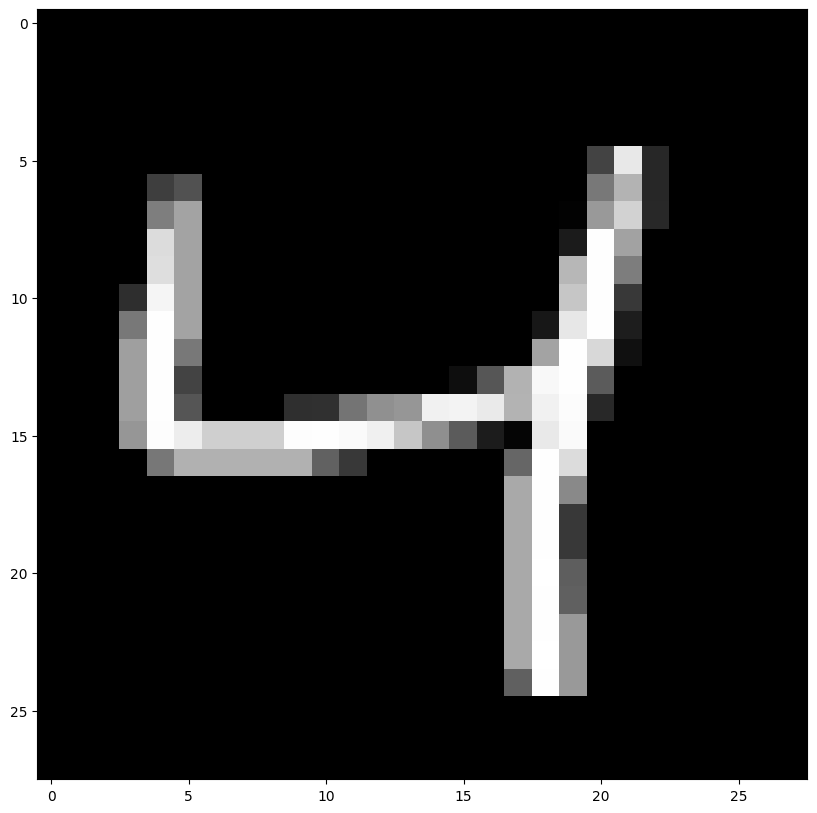

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[2], cmap='gray')

RGB takes values between (0-255)
r: Red g: Green b: Blue
At points where all are 0, the color is black, and at points where all are 255, the color is white.

In [12]:
x_train[2].shape

(28, 28)

In [13]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

Here **28x28** is the pixels of the image poured into the matrix. The color average of the color values in each pixel in the matrix is obtained.

In [14]:
x_train[2][10, 10]      # Here we find the color average of the pixels corresponding to 10 by 10 in our image. We see that it is a black color because of 0.

0

In [15]:
x_train[2].mean()

24.799744897959183

In [16]:
x_train[2].sum()

19443

In [17]:
x_train[2][14:20, 10:20]    # The process here allows us to segment the image. In other words, it allows us to examine certain points in the image.

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [18]:
x_train[2][14:20, 10:20].mean()   # The average of the particular area of the image we examined was 96.5. This allows us to estimate the average color in that area.


96.51666666666667

In [19]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / (2.5)

  for x in range(width):
    for y in range(height):
        ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                    color='white' if img[x][y] < threshold else 'black')

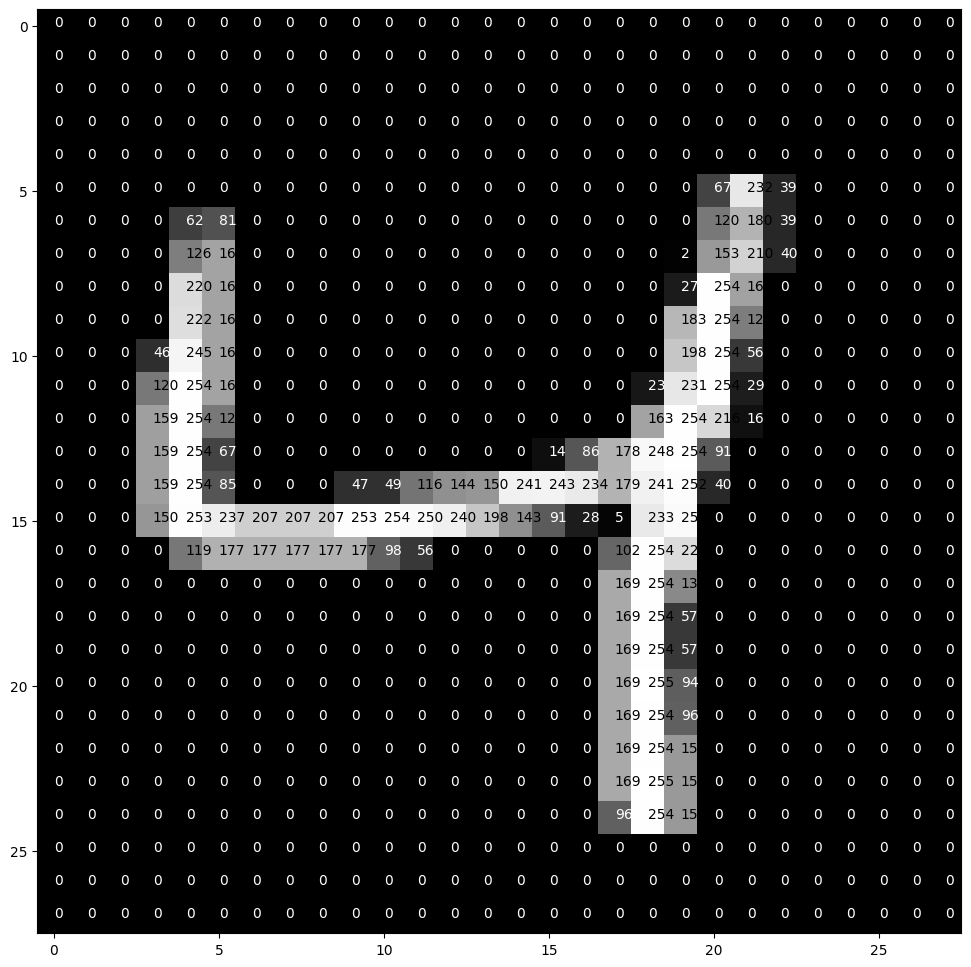

In [20]:
pixel_visualize(x_train[2])

# Data Preparation


*   Before: [0 1 2 3 4 5 6 7 8 9]
*   After: [0 0 1 0 0 0 0 0 0]



In [21]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_train = to_categorical(y_train)     # It transforms y_train. Currently, the way variables are expressed is with One Hot Encoding style.
y_test = to_categorical(y_test)

In [23]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In [24]:
image_size = x_train.shape[1]

In [25]:
image_size

28

In [26]:
print(f"x_train Size: {x_train.shape}")
print(f"x_test Size: {x_test.shape}")

x_train Size: (60000, 28, 28)
x_test Size: (10000, 28, 28)


In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train Size: {x_train.shape}")
print(f"x_test Size: {x_test.shape}")

x_train Size: (60000, 28, 28, 1)
x_test Size: (10000, 28, 28, 1)


# Normalization

The color codes on the pixels were between 0-255, we will standardize them between 0-1. But why?

* It is to try to ensure that the training period is faster and the learning process is carried out more accurately or in a way that can reach the result faster.

* The easiest way to convert this to 0-1 is to divide by 255. In this way, values of 255, that is, the max value will be 1 and the min value will be 0.

In [28]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# Modelling

Defining Neural Network Architecture

In [29]:
# External Features of ANN
model = tf.keras.Sequential([         # 1
    Flatten(input_shape=(28, 28, 1)), # 2
    Dense(units=128, activation='relu', name='layer1'),   # 3
    Dense(units=num_labels, activation='softmax', name='output_layer')])    # 4

# Internal Features of ANN
model.compile(loss='categorical_crossentropy',  # 5
              optimizer='adam',                 # 6
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])      ## 7

1 -> It helps us to establish an artificial neural network. It means sequential, it allows us to create an artificial neural network consisting of sequential layers.

2 -> We have already shaped it before, now we need to reshape it for ANN to understand. This is also a layer. The ANN converts the ANN into the format it can use. It is the layer where inputs are shaped.

3 -> It is the hidden layer. It is the 1st layer.
         units=128 -> There are 128 neurons. It may change.
         activation='relu' -> We determine which function we will use. It may change.
         name='layer1' -> We named the layer. subject to change

4 -> It is the output layer.
         activation='softmax' -> It may change according to our needs.
         units=num_labels -> Since we have 10 classes. There will be 10 classes in the output layer, which is what we want. (0 1 2 3 4 5 6 7 8 9)
         name='output_layer' _> Naming may change.

5 -> It is the error evaluation metric. The aim is to minimize.
         loss = 'categorical_crossentropy' -> Since it is a multi-class classification, we use categorical_crossentropy

6 -> It helps to optimize the loss function to be optimized.
         optimizer='adam' -> It is the optimization algorithm that will minimize the loss function. It can change.
             --> Stochastic Gradient Descent vs. etc.

7 -> Allows us to look at error metrics.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.3592 - precision: 0.9471 - recall: 0.8482 - accuracy: 0.9021 - val_loss: 0.1947 - val_precision: 0.9574 - val_recall: 0.9322 - val_accuracy: 0.9447
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1621 - precision: 0.9645 - recall: 0.9437 - accuracy: 0.9536 - val_loss: 0.1338 - val_precision: 0.9702 - val_recall: 0.9525 - val_accuracy: 0.9605
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1161 - precision: 0.9741 - recall: 0.9599 - accuracy: 0.9669 - val_loss: 0.1076 - val_precision: 0.9753 - val_recall: 0.9628 - val_accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0885 - precision: 0.9793 - recall: 0.9701 - accuracy: 0.9744 - val_loss: 0.0944 - val_precision: 0.9761 - val_recall: 0.9665 - val_accuracy: 0.9717
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0727 - precision: 0.9825 - r

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

=> x_train = x values
=> y_train = y values
=> epochs = We say how many rounds we need to take. We tell how many times we need to optimize
=> batch_size = During optimization processes, all observation units in the data set should be taken into account in each epoch in gradient calculations. The number 128 was given as the answer to the question "Or should we randomly select a certain number of subsets and weight updates should be made through this active set?" Focusing on 128 observation units in each iteration, gradients and derivatives will be calculated based on the relevant optimization method and moved on to the next epoch.

# Evulation

In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0265 - precision: 0.9940 - recall: 0.9916 - accuracy: 0.9930 - val_loss: 0.0703 - val_precision: 0.9811 - val_recall: 0.9763 - val_accuracy: 0.9777
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0220 - precision: 0.9955 - recall: 0.9936 - accuracy: 0.9945 - val_loss: 0.0691 - val_precision: 0.9802 - val_recall: 0.9760 - val_accuracy: 0.9780
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - precision: 0.9962 - recall: 0.9948 - accuracy: 0.9955 - val_loss: 0.0718 - val_precision: 0.9788 - val_recall: 0.9754 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0163 - precision: 0.9968 - recall: 0.9957 - accuracy: 0.9963 - val_loss: 0.0734 - val_precision: 0.9793 - val_recall: 0.9767 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0136 - precision: 0.9974 - r

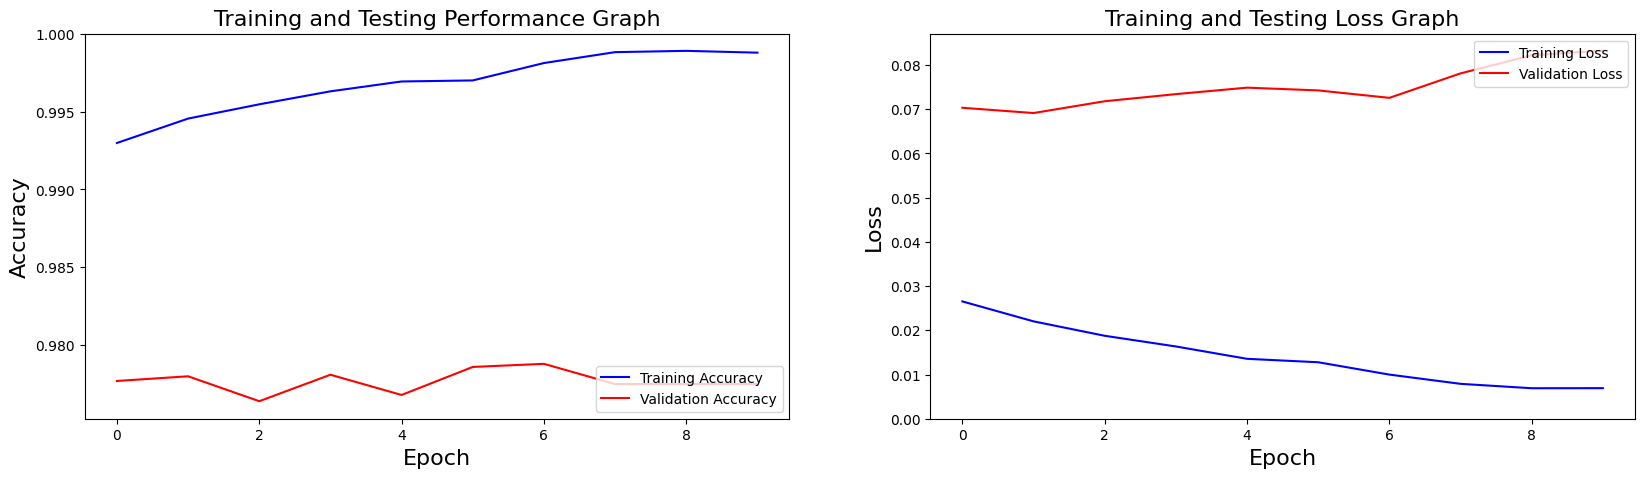

In [33]:
#################################
# Accuracy and Loss Graphics
#################################

# -------------------------- Graphics 1 Accuracy ---------------------------------------

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Testing Performance Graph', fontsize=16)

# -------------------------- Graphics 2 Accuracy ---------------------------------------

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Testing Loss Graph', fontsize=16)
plt.show()

In [34]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)

print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.8%

Test Loss: 8.3%

Test Precision: 97.9%

Test Recall: 97.7%


Precision and Recall
Since the Precision and Recall values are very close to the Accuracy value, I can verify my success from different angles.
What do we mean by different perspectives?

Precision and Recall
-> Actually, it gives us good information when the data set is unbalanced in terms of these classes. That's the reason we took it with us here.
Since the Precision and Recall values are very close to the Accuracy value, we come to the following conclusion. We say that there is no imbalance between classes and we are successful in the following subjects.

In what subjects are we successful?

Precision
-> It indicates whether the values we predict through the model are actually the predicted value or not.
So, for example, let's choose 1 class out of 10 and let it be class 1. It indicates how many of the classes we predicted as class 1 are actually class 1.
In short, Precision is the success of what we predicted. When determining how well I match reality.

Recall
-> It tells us how many of the true values of these classes we guessed correctly.
-> First we focus on the real values. We check how many of them we guessed correctly.

# Saving the Model and Using it for Prediction

In [35]:
model.save('mnist_models.h5')

In [36]:
import random

random = random.randint(0, x_test.shape[0])

In [37]:
random

1919

In [38]:
test_image = x_test[random]

In [39]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

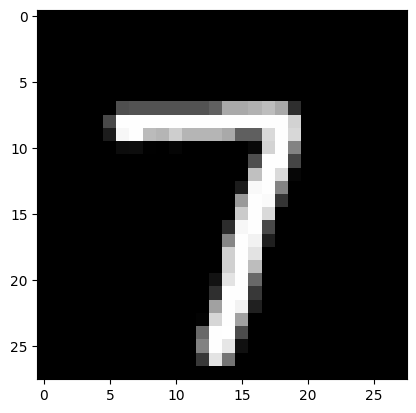

In [40]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')

In [41]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [42]:
probalitiy = model.predict(test_data)

1/1 [==============================] - 0s 100ms/step


In [43]:
predicted_classes = np.argmax(probalitiy)

In [44]:
predicted_classes

7

In [45]:
print(f"Predicted Class: {predicted_classes} \n")
print(f"Predicted Probability Value: {(np.max(probalitiy, axis=-1))[0]} \n")
print(f"Probability Values of Other Classes: \n{probalitiy} \n")

Predicted Class: 7 

Predicted Probability Value: 0.9999998807907104 

Probability Values of Other Classes: 
[[3.6245485e-14 6.9486821e-09 1.2095271e-11 5.8505428e-08 5.3205355e-14
  4.0060466e-17 1.8868743e-23 9.9999988e-01 5.0099738e-12 9.8224389e-12]] 

